# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

## Import Statements

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import folium
from collections import Counter

## Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [3]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [4]:
# shape of the dataframes
print(df_hh_income.shape)
print(df_pct_poverty.shape)
print(df_pct_completed_hs.shape)
print(df_share_race_city.shape)
print(df_fatalities.shape)

(29322, 3)
(29329, 3)
(29329, 3)
(29268, 7)
(2535, 14)


In [5]:
# column names
print(df_hh_income.columns)
print(df_pct_poverty.columns)
print(df_pct_completed_hs.columns)
print(df_share_race_city.columns)
print(df_fatalities.columns)

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [6]:
# is there any missing data
print(f'INCOME \n {df_hh_income.isnull().sum()}')
print(f'Poverty \n {df_pct_poverty.isnull().sum()}')
print(f'High School \n {df_pct_completed_hs.isnull().sum()}')
print(f'Race \n {df_share_race_city.isnull().sum()}')
print(f'Fatalities\n {df_fatalities.isnull().sum()}')

INCOME 
 Geographic Area     0
City                0
Median Income      51
dtype: int64
Poverty 
 Geographic Area    0
City               0
poverty_rate       0
dtype: int64
High School 
 Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64
Race 
 Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64
Fatalities
 id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64


In [7]:
# print the duplicate rows
print(df_hh_income.duplicated().sum())
print(df_pct_poverty.duplicated().sum())
print(df_pct_completed_hs.duplicated().sum())
print(df_share_race_city.duplicated().sum())
print(df_fatalities.duplicated().sum())

0
0
0
0
0


## Data Cleaning - Check for Missing Values and Duplicates

Mean - mode imputation is held.

In [8]:
# Replace the missing values in the 'Median Income' column with the mean
df_hh_income['Median Income'] = pd.to_numeric(df_hh_income['Median Income'], errors='coerce')
df_hh_income['Median Income'].fillna(df_hh_income['Median Income'].mean(), inplace=True)


# Replace the missing values in the fatalities with the mean for numeric columns and mode for categorical columns
df_fatalities['age'].fillna(df_fatalities['age'].mean(), inplace=True)
df_fatalities['race'].fillna(df_fatalities['race'].mode()[0], inplace=True)
df_fatalities['armed'].fillna(df_fatalities['armed'].mode()[0], inplace=True)
df_fatalities['flee'].fillna(df_fatalities['flee'].mode()[0], inplace=True)


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [9]:
# Convert 'poverty_rate' to numeric, setting non-numeric entries to NaN
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')

# Replace NaN values with the mean of the 'poverty_rate' column
mean_poverty_rate = df_pct_poverty['poverty_rate'].mean()
df_pct_poverty['poverty_rate'].fillna(mean_poverty_rate, inplace=True)

# Group by state and calculate the mean poverty rate for each state
grouped_data = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().reset_index()

# Sort by poverty rate in descending order
grouped_data_sorted = grouped_data.sort_values(by='poverty_rate', ascending=False)


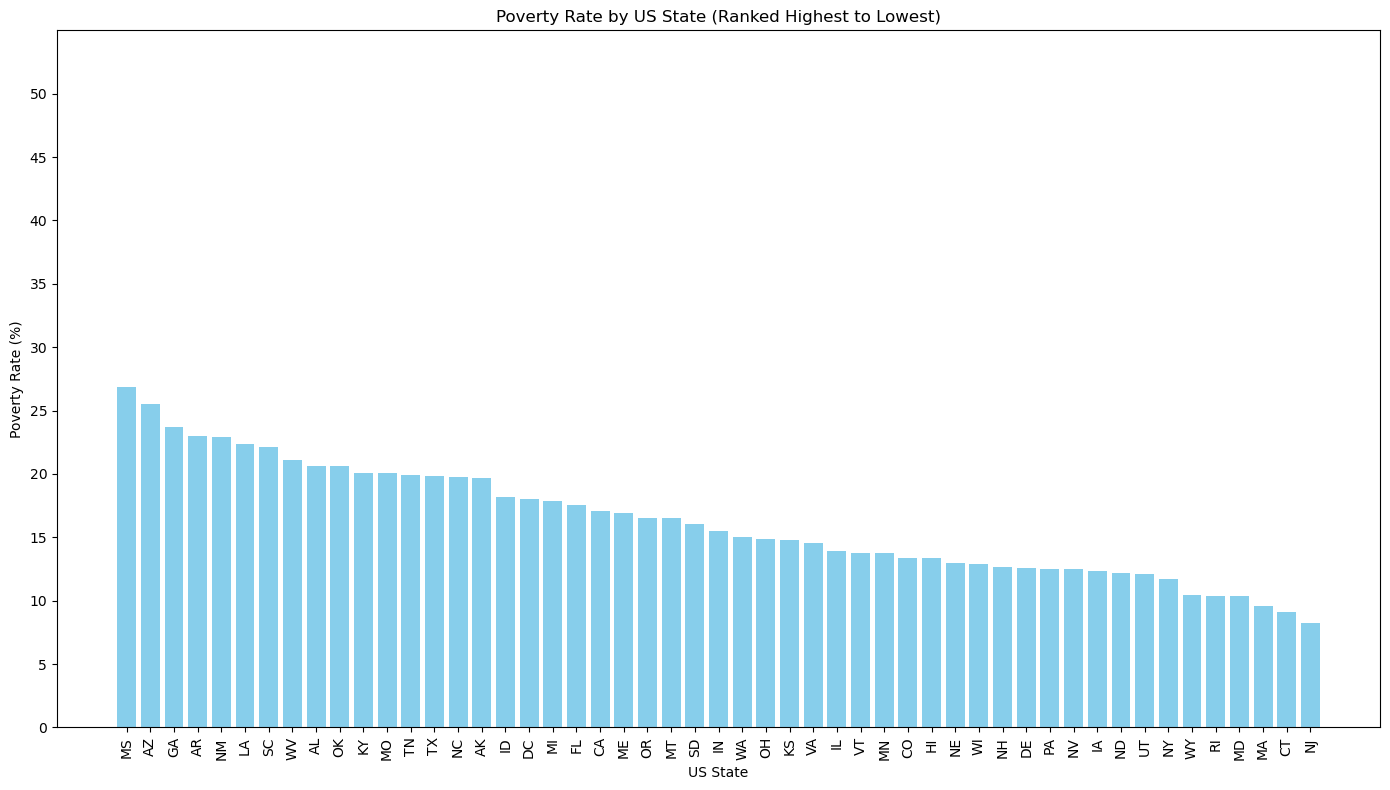

In [10]:
# Create a bar chart that ranks the poverty rate from highest to lowest by US state.

fig1 = plt.figure(figsize=(14, 8))
plt.bar(grouped_data_sorted['Geographic Area'], grouped_data_sorted['poverty_rate'], color='skyblue')
plt.yticks(np.arange(0, 55, 5))  # Customize y-tick positions (e.g., every 5 units)
plt.ylim(0, 55)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('US State')
plt.ylabel('Poverty Rate (%)')
plt.title('Poverty Rate by US State (Ranked Highest to Lowest)')
plt.tight_layout()  # Adjust layout for better fit
plt.show()


In [11]:
highest_poverty_state = grouped_data_sorted.iloc[0]
lowest_poverty_state = grouped_data_sorted.iloc[-1]

highest_state = highest_poverty_state['Geographic Area']
lowest_state = lowest_poverty_state['Geographic Area']
highest_rate = highest_poverty_state['poverty_rate']
lowest_rate = lowest_poverty_state['poverty_rate']

print(f"Highest Poverty Rate: {highest_state} with {round(highest_rate, 2)}%")
print(f"Lowest Poverty Rate: {lowest_state} with {round(lowest_rate, 2)}%")

Highest Poverty Rate: MS with 26.88%
Lowest Poverty Rate: NJ with 8.22%


# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [12]:
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')
grouped_hs = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().reset_index()
grouped_hs_sorted = grouped_hs.sort_values(by='percent_completed_hs', ascending=False)

highest_hs = grouped_hs_sorted.iloc[0]
lowest_hs = grouped_hs_sorted.iloc[-1]

highest_hs_state = highest_hs['Geographic Area']
lowest_hs_state = lowest_hs['Geographic Area']
highest_hs_rate = highest_hs['percent_completed_hs']
lowest_hs_rate = lowest_hs['percent_completed_hs']

print(f"Highest High School Graduation Rate: {highest_hs_state} with {round(highest_hs_rate, 2)}%")
print(f"Lowest High School Graduation Rate: {lowest_hs_state} with {round(lowest_hs_rate, 2)}%")

Highest High School Graduation Rate: MA with 92.4%
Lowest High School Graduation Rate: TX with 75.69%


Text(0.5, 1.0, 'High School Graduation Rate by US State (Ranked Highest to Lowest)')

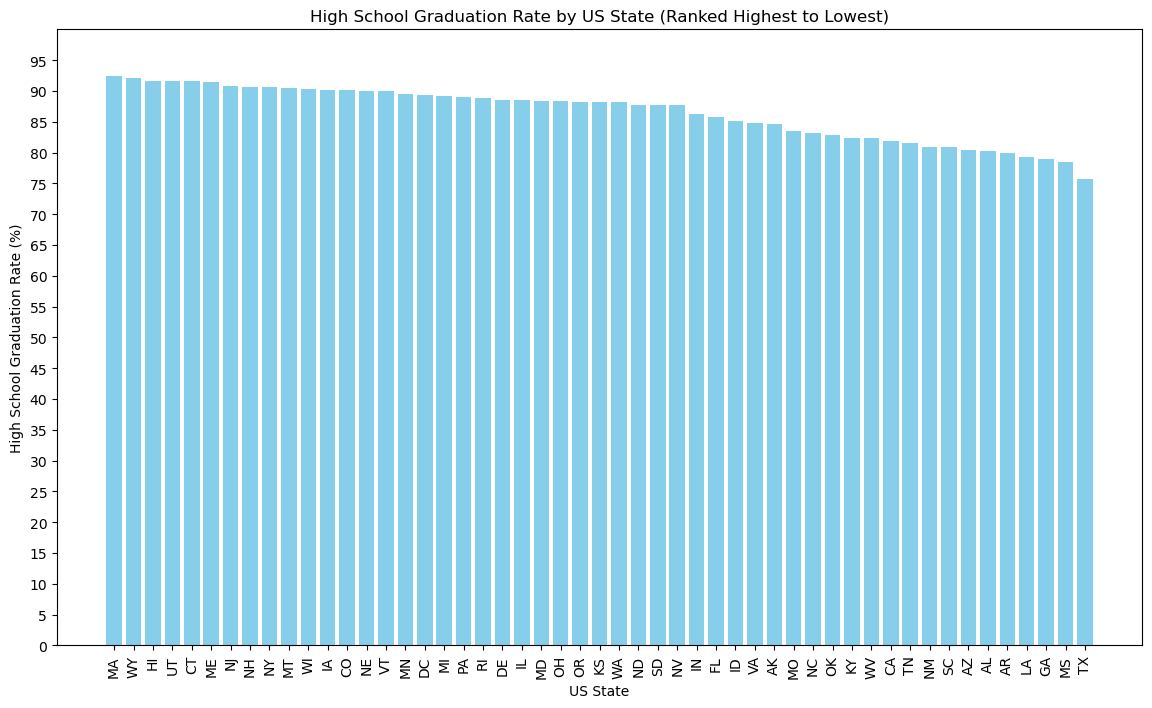

In [13]:
fig2 = plt.figure(figsize=(14, 8))
plt.bar(grouped_hs_sorted['Geographic Area'], grouped_hs_sorted['percent_completed_hs'], color='skyblue')
plt.yticks(np.arange(0, 100, 5))  # Customize y-tick positions (e.g., every 10 units)
plt.ylim(0, 100)

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('US State')
plt.ylabel('High School Graduation Rate (%)')
plt.title('High School Graduation Rate by US State (Ranked Highest to Lowest)')

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

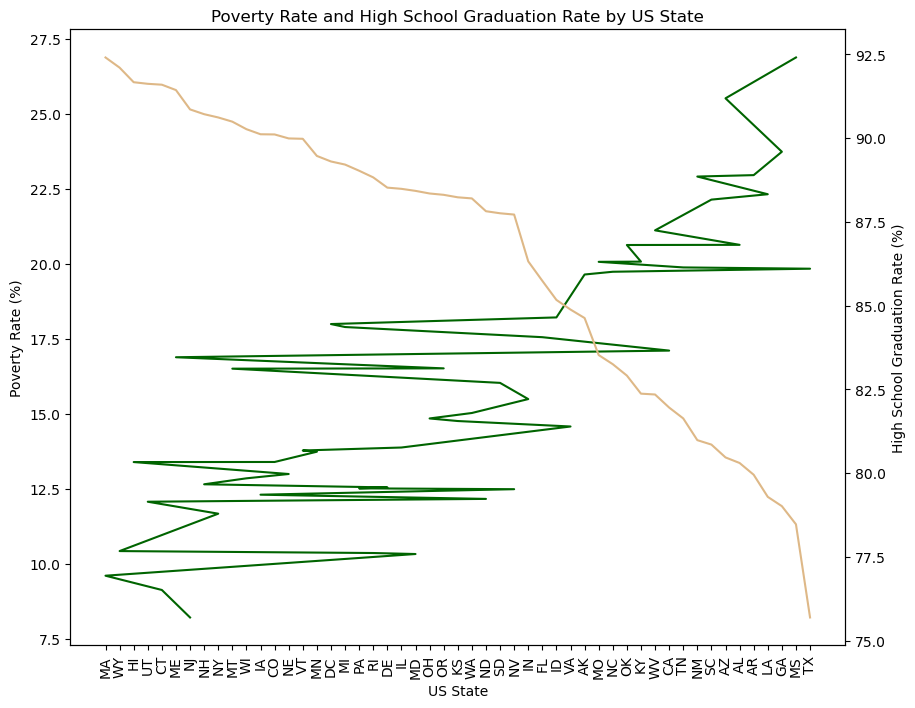

In [60]:
fig3, ax1 = plt.subplots(figsize=(10, 8))

ax1.plot(grouped_data_sorted['Geographic Area'], grouped_data_sorted['poverty_rate'], color='darkgreen')
ax1.set_xlabel('US State')
# x ticks size and rotation
plt.xticks(rotation=90, size=10)
ax1.set_ylabel('Poverty Rate (%)')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(grouped_hs_sorted['Geographic Area'], grouped_hs_sorted['percent_completed_hs'], color='burlywood')
ax2.set_ylabel('High School Graduation Rate (%)', )
ax2.tick_params(axis='y')
plt.title('Poverty Rate and High School Graduation Rate by US State')
plt.show()

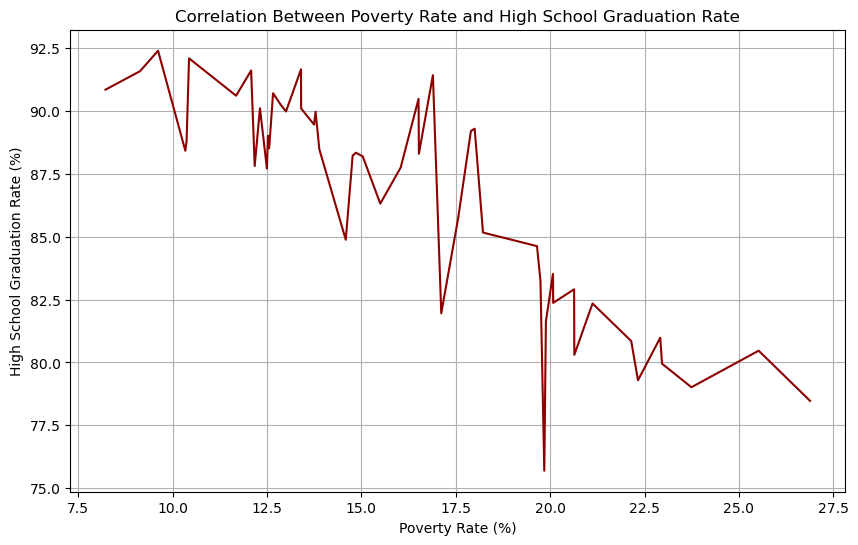

In [15]:
# Merge the two DataFrames by 'Geographic Area' (state) to align them
merged_data = pd.merge(grouped_data_sorted, grouped_hs_sorted, on='Geographic Area')

# Now plot the correlation between poverty rate and high school graduation rate
fig4 = plt.figure(figsize=(10, 6))
plt.plot(merged_data['poverty_rate'], merged_data['percent_completed_hs'], color='darkred')

# Add labels and title
plt.xlabel('Poverty Rate (%)')
plt.ylabel('High School Graduation Rate (%)')
plt.title('Correlation Between Poverty Rate and High School Graduation Rate')
plt.grid(True)
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

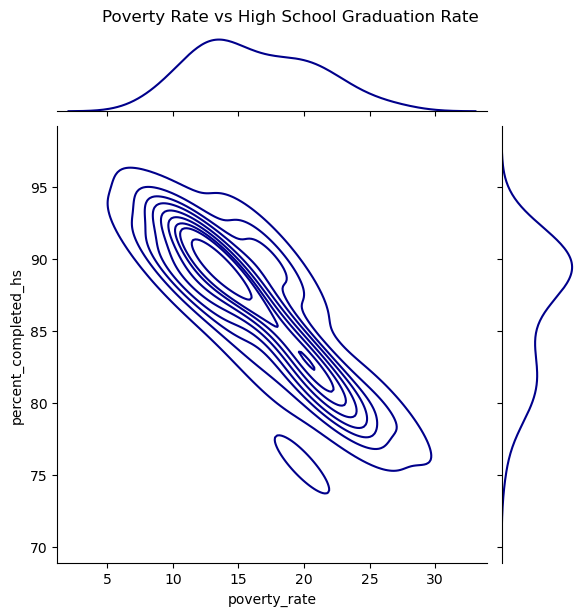

In [61]:
# Create a jointplot with KDE and scatter plot for correlation between poverty rate and high school graduation rate
fig5 = sns.jointplot(x='poverty_rate', y='percent_completed_hs', data=merged_data, kind='kde', color='darkblue')

# Add a title for the plot
plt.suptitle('Poverty Rate vs High School Graduation Rate', x=0.5, y=1.02)

# Show the plot
plt.show()


#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

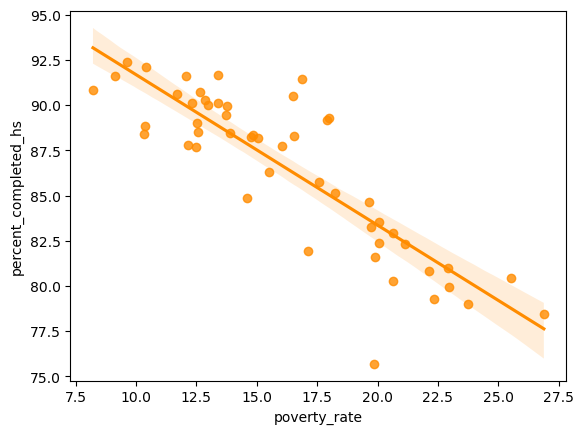

In [17]:
# Linear regression with .regplot

fig6 = sns.regplot(x='poverty_rate', y='percent_completed_hs', data=merged_data, color='darkorange')

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [18]:
df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']] = \
    df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].apply(pd.to_numeric, errors='coerce')


In [19]:

# Group by 'Geographic area' and calculate the mean for each numeric column
grouped_race = df_share_race_city.groupby('Geographic area').agg({
    'share_white': 'mean',
    'share_black': 'mean',
    'share_native_american': 'mean',
    'share_asian': 'mean',
    'share_hispanic': 'mean'
}).reset_index()

# Normalize the data by dividing each racial share by the row total
grouped_race_normalized = grouped_race.drop('Geographic area', axis=1).div(grouped_race.drop('Geographic area', axis=1).sum(axis=1), axis=0)

grouped_race_normalized['Geographic area'] = grouped_race['Geographic area']
grouped_race_normalized.set_index('Geographic area', inplace=True)



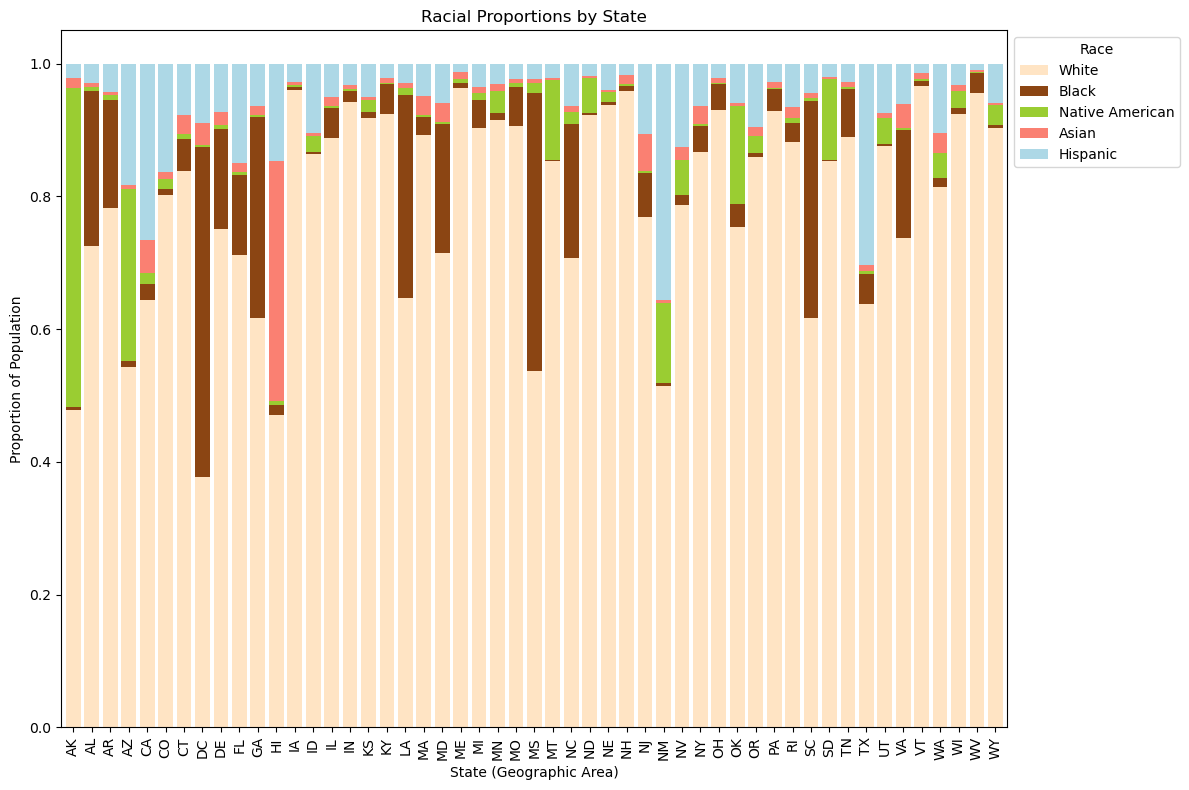

In [20]:
# Define custom color order, making 'black' the darkest color
color_order = ['bisque', 'saddlebrown','yellowgreen', 'salmon',  'lightblue', 'indianred']

# Plot a stacked 100% bar chart
ax = grouped_race_normalized.plot(kind='bar', stacked=True, figsize=(12, 8), color=color_order, width=0.8)

# Set the labels and title
ax.set_ylabel('Proportion of Population')
ax.set_xlabel('State (Geographic Area)')
ax.set_title('Racial Proportions by State')

# Show the legend with racial groups (ensuring correct order)
ax.legend(title='Race', labels=['White', 'Black', 'Native American','Asian','Hispanic'], loc='upper left', bbox_to_anchor=(1, 1))

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

# Create Donut Chart by of People Killed by Race


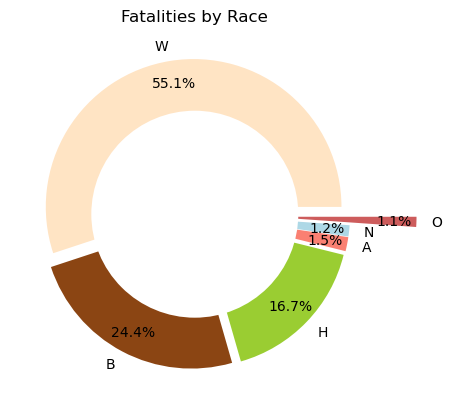

In [21]:
race_fatalities = df_fatalities.value_counts('race')

explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.5)
fig8 = plt.pie(race_fatalities, colors=color_order, labels=race_fatalities.index,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Fatalities by Race')
plt.show()


# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [22]:
# Use `df_fatalities` to illustrate how many more men are killed compared to women. 
fatalities_gender = df_fatalities.value_counts('gender')
male_fatalities = fatalities_gender['M']
female_fatalities = fatalities_gender['F']
total_fatalities = fatalities_gender.sum()
percentages = (fatalities_gender / total_fatalities) * 100

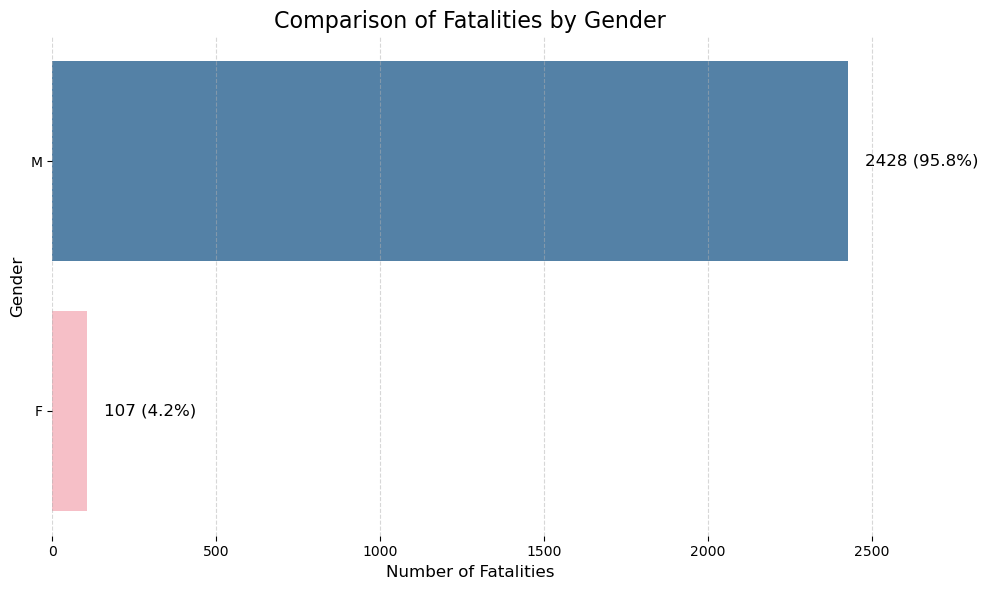

In [23]:
# Create a horizontal bar chart
fig9 = plt.figure(figsize=(10, 6))
sns.barplot(x=fatalities_gender.values, y=fatalities_gender.index, palette=['steelblue', 'lightpink'])

# Add annotations for exact numbers and percentages
for i, (value, percentage) in enumerate(zip(fatalities_gender, percentages)):
    plt.text(value + 50, i, f'{int(value)} ({percentage:.1f}%)', va='center', color='black', fontsize=12)

# Add a title and labels
plt.title('Comparison of Fatalities by Gender', fontsize=16)
plt.xlabel('Number of Fatalities', fontsize=12)
plt.ylabel('Gender', fontsize=12)

# Style the chart
sns.despine(left=True, bottom=True)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

# A Box Plot Showing the Age and Manner of Death


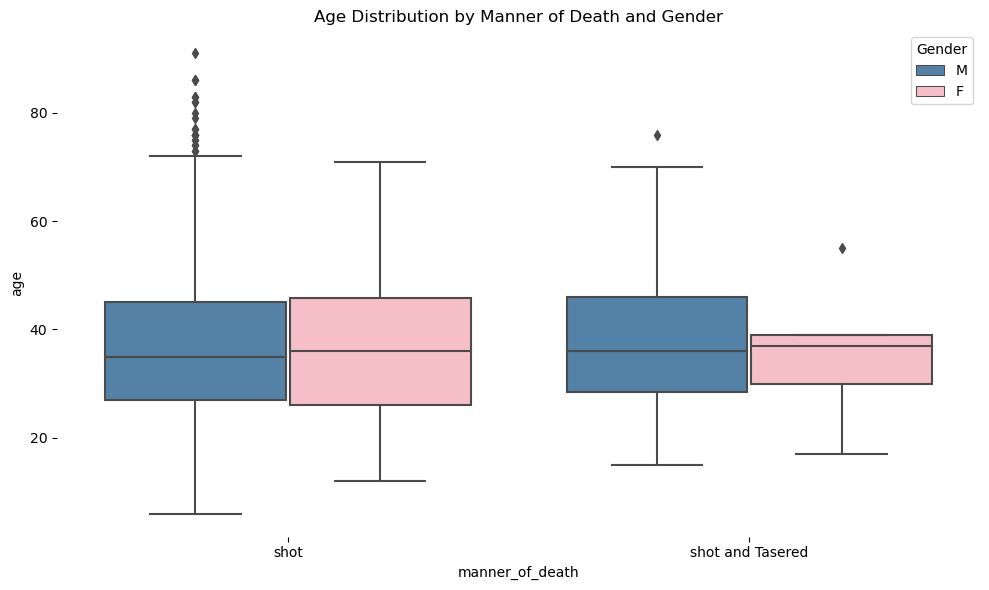

In [24]:
fig10 = plt.figure(figsize=(10, 6))
sns.boxplot(x='manner_of_death', y='age', hue='gender', data=df_fatalities, palette=['steelblue', 'lightpink'])
plt.title('Age Distribution by Manner of Death and Gender')
sns.despine(left=True, bottom=True)
plt.legend(title='Gender')
plt.tight_layout()

plt.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

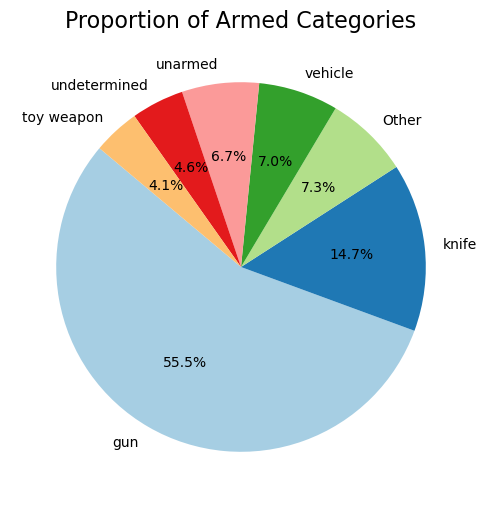

In [25]:
armed_cnt = df_fatalities['armed'].value_counts(normalize=True)

# Identify categories below the 3% threshold
low_count_categories = armed_cnt[armed_cnt < 0.02].index

# Replace low-count categories with "Other"
df_fatalities['armed_grouped'] = df_fatalities['armed'].replace(low_count_categories, 'Other')

# Recalculate value counts for the grouped 'armed' column
armed_grouped_cnt = df_fatalities['armed_grouped'].value_counts()

# Create the pie chart
fig11 = plt.figure(figsize=(10, 6))
plt.pie(
    armed_grouped_cnt, 
    labels=armed_grouped_cnt.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Paired.colors
)
plt.title('Proportion of Armed Categories', fontsize=16)
plt.show()


In [26]:
# armed vs unarmed 
unarmed_count = armed_grouped_cnt['unarmed']
armed_cnt = armed_grouped_cnt.sum() - unarmed_count
print(f'Decesead armed: {armed_cnt}')
print(f'Deceased unarmed: {unarmed_count}')


Decesead armed: 2364
Deceased unarmed: 171


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

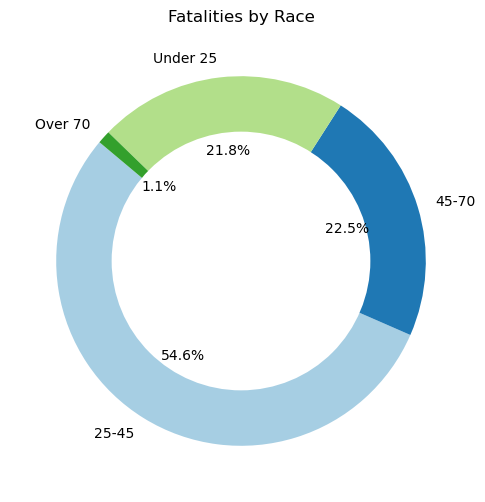

In [27]:
# group under 25 
df_fatalities['age_group'] = pd.cut(df_fatalities['age'], bins=[0, 25, 45, 70, 100], labels=['Under 25', '25-45', '45-70', 'Over 70'])
fig12 = plt.figure(figsize=(10, 6))
plt.pie(df_fatalities['age_group'].value_counts(), labels=df_fatalities['age_group'].value_counts().index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Fatalities by Race')
plt.show()

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

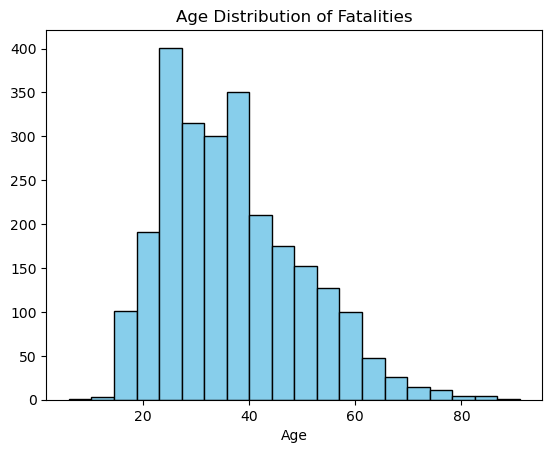

In [28]:
plt.hist(df_fatalities['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.title('Age Distribution of Fatalities')
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

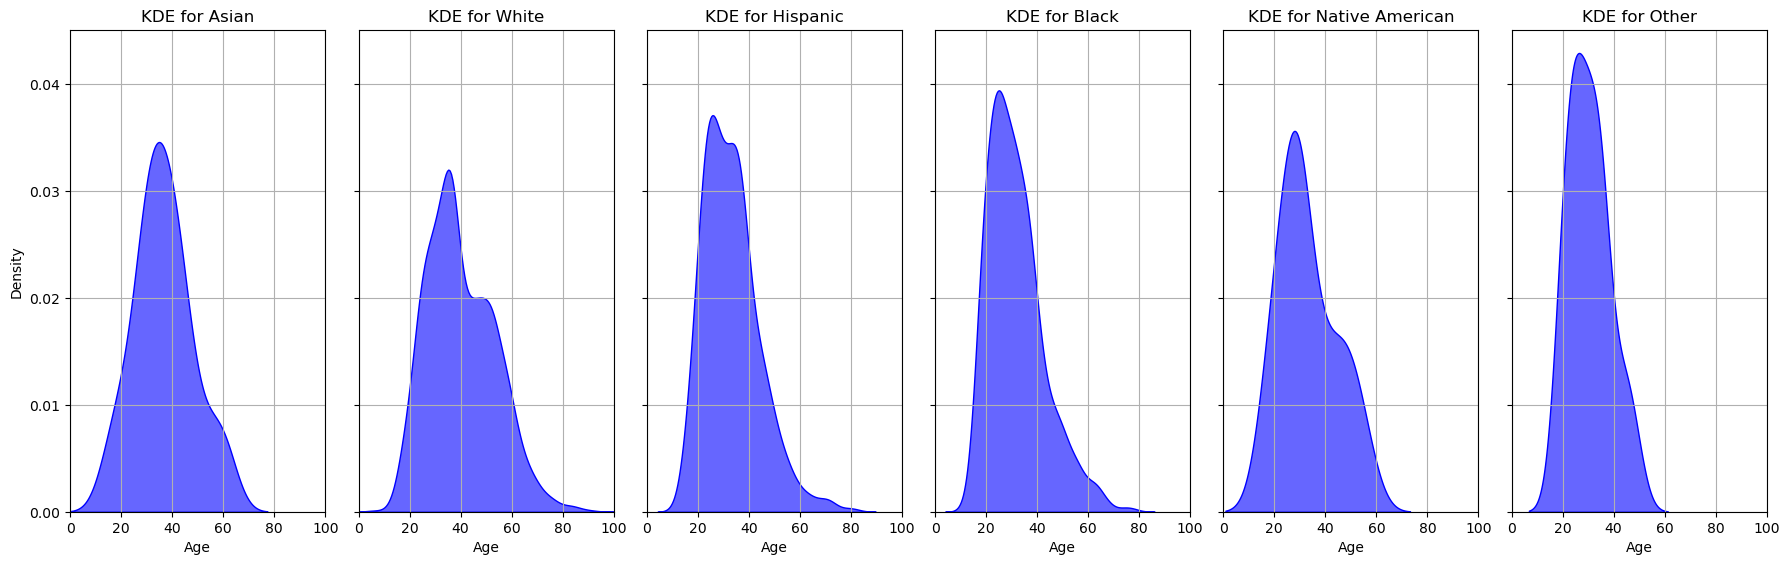

In [29]:
df_race_age = df_fatalities[['age', 'race']].dropna()
races = ['Asian', 'White', 'Hispanic', 'Black', 'Native American', 'Other']
fig14, axes = plt.subplots(1, len(df_race_age['race'].unique()), figsize=(18, 6), sharey=True)
holder = 0
for ax, race in zip(axes, df_race_age['race'].unique()):
    
    subset = df_race_age[df_race_age['race'] == race]
    sns.kdeplot(data=subset, x='age', ax=ax, fill=True, alpha=0.6, color='blue')
    ax.set_title(f'KDE for {races[holder]}')
    ax.set_xlabel('Age')
    ax.set_xlim(0, 100)  # Assuming ages range between 0 and 100
    ax.grid(True)
    holder += 1

# Set overall title
fig.suptitle('Age Distribution by Race', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust space for the main title
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

Text(0.5, 1.0, 'Fatalities by Race')

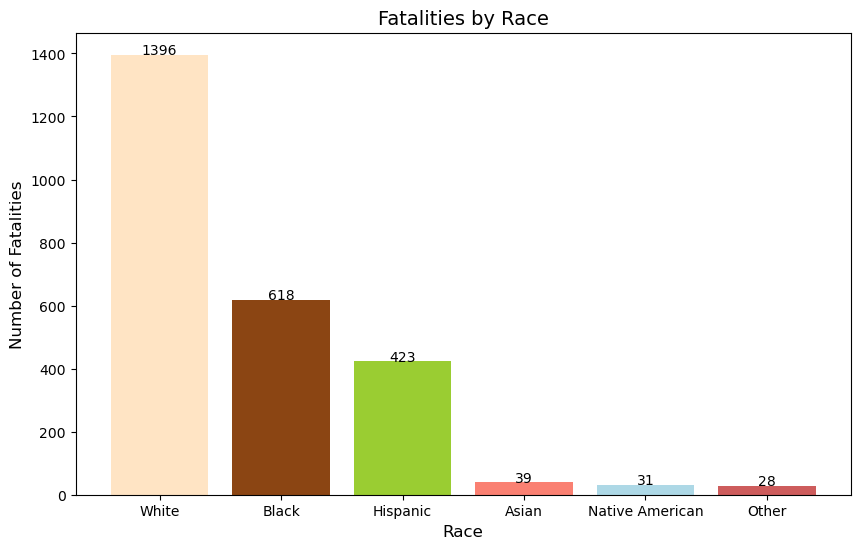

In [30]:
race_fatalities.index = ['White', 'Black', 'Hispanic', 'Asian', 'Native American', 'Other']
fig15 = plt.figure(figsize=(10, 6))

plt.bar(x=race_fatalities.index, height=race_fatalities, color=color_order)
for i, value in enumerate(race_fatalities):
    plt.text(i, value + 0.5, str(value), ha='center', fontsize=10)

# Set labels and title
plt.xlabel('Race', fontsize=12)
plt.ylabel('Number of Fatalities', fontsize=12)
plt.title('Fatalities by Race', fontsize=14)


# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [31]:
mental_illness = df_fatalities['signs_of_mental_illness'].value_counts(normalize=True)
mental_illness.index = ['No', 'Yes']

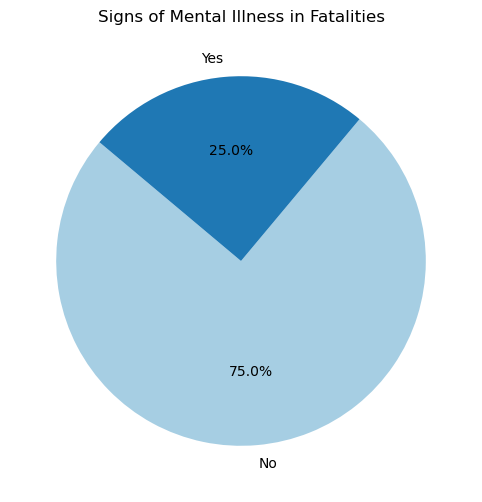

In [32]:
fig16 = plt.figure(figsize=(10, 6))
plt.pie(mental_illness, labels=mental_illness.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Signs of Mental Illness in Fatalities')
plt.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [33]:
fatalities_city = df_fatalities['city'].value_counts().head(10)

geolocator = Nominatim(user_agent="geoapi")

# Create a dictionary to store city coordinates
coordinates = {}

for city in fatalities_city.index:
    location = geolocator.geocode(city)
    if location:
        coordinates[city] = (location.latitude, location.longitude)
    else:
        print(f"Coordinates not found for {city}")

coordinates_df = pd.DataFrame.from_dict(coordinates, orient='index', columns=['latitude', 'longitude'])

# Merge with fatalities data
fatalities_city_df = pd.DataFrame(fatalities_city).reset_index()
fatalities_city_df.columns = ['city', 'count']
fatalities_city_df = fatalities_city_df.merge(coordinates_df, left_on='city', right_index=True)


In [34]:
import folium

# Create a folium map centered at the mean latitude and longitude
map_center = [fatalities_city_df['latitude'].mean(), fatalities_city_df['longitude'].mean()]
fatalities_map = folium.Map(location=map_center, zoom_start=5)

# Add markers to the map
for _, row in fatalities_city_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['count'] / 5,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        tooltip=f"{row['city']}: {row['count']} fatalities"
    ).add_to(fatalities_map)

# Display the map
fatalities_map

# Number of Police Killings Over Time


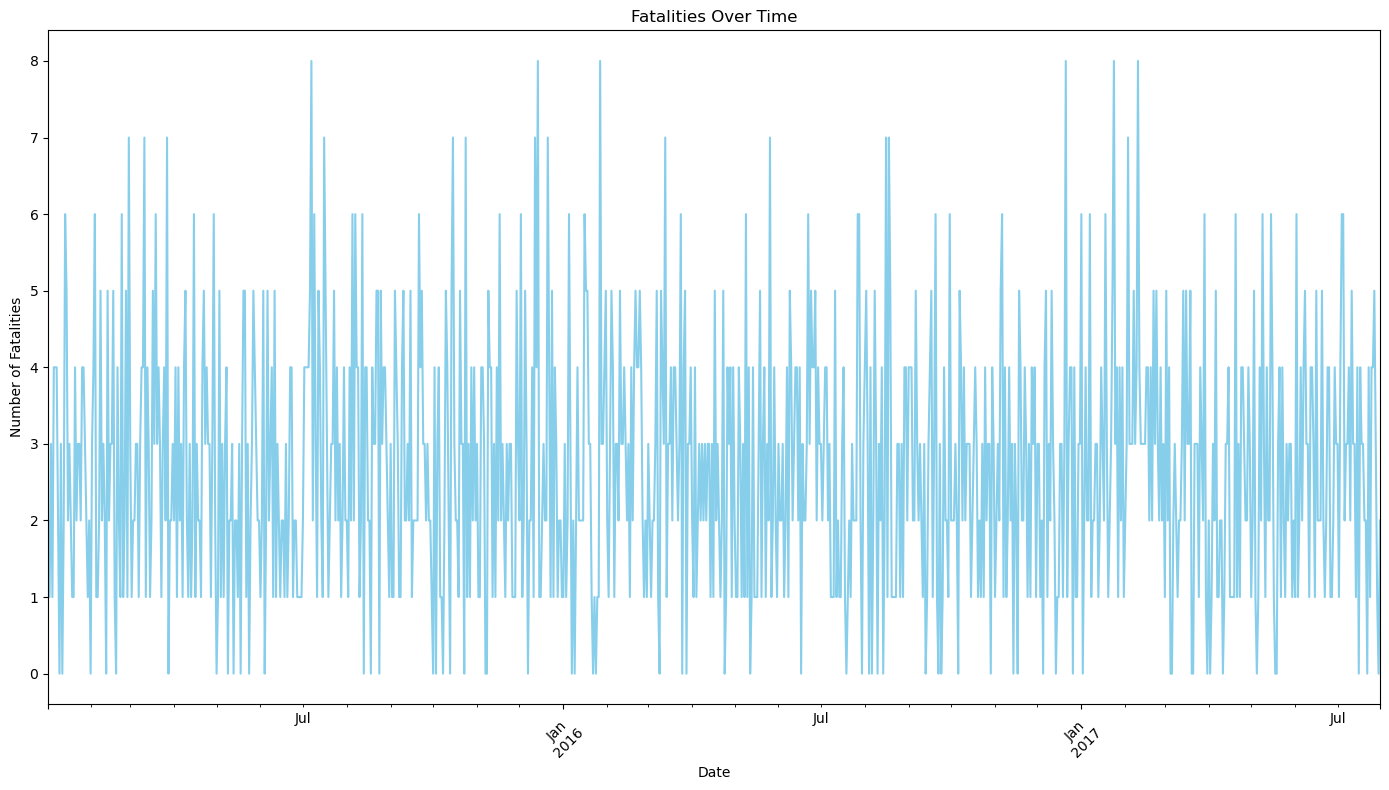

In [51]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'], format='%d/%m/%y')

fatalities_by_date = df_fatalities['date'].value_counts().sort_index()

date_range = pd.date_range(start=fatalities_by_date.index.min(), end=fatalities_by_date.index.max(), freq='D')

fatalities_by_date = fatalities_by_date.reindex(date_range, fill_value=0)


fig17 = plt.figure(figsize=(14, 8))
fatalities_by_date.plot(kind='line', color='skyblue')


plt.title('Fatalities Over Time')


plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Number of Fatalities')


plt.tight_layout()
plt.show()


<Axes: >

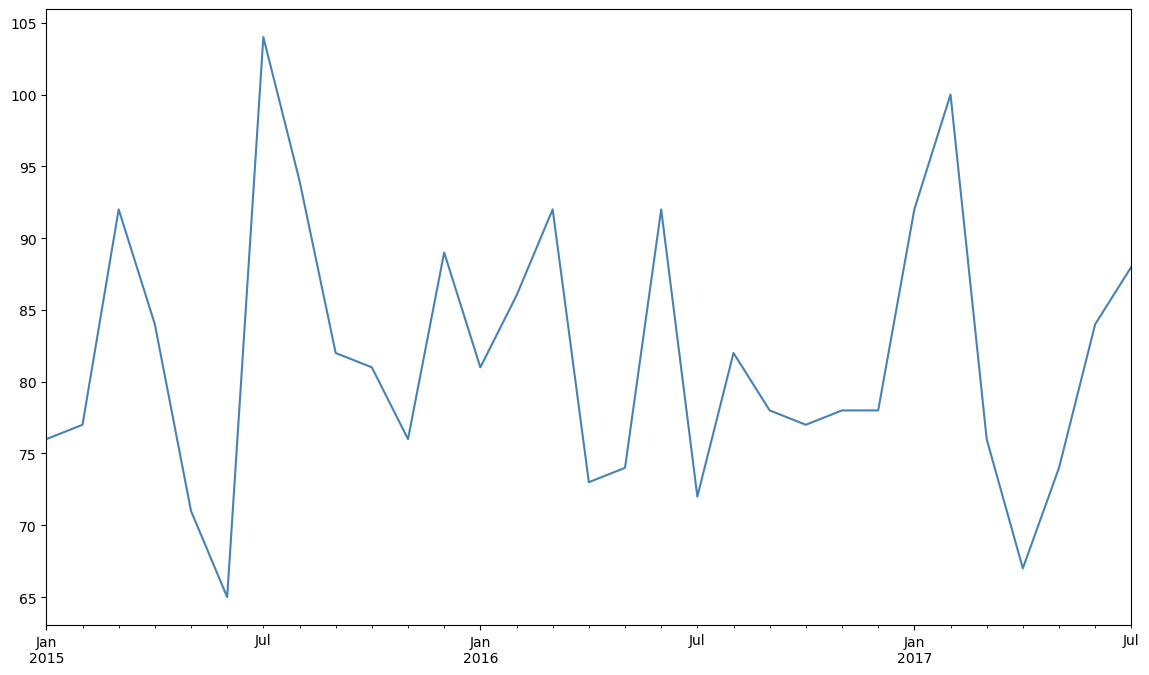

In [56]:
df_fatalities['month-year'] = df_fatalities['date'].dt.to_period('M')
fatalities_by_month_year = df_fatalities['month-year'].value_counts().sort_index()
fatalities_by_month_year.plot(kind='line', color='dodgerblue', figsize=(14, 8))

<Axes: >

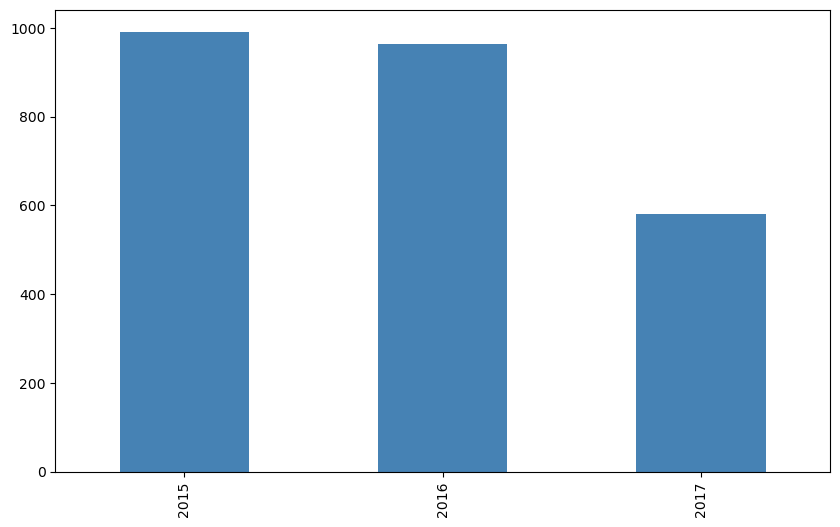

In [57]:
df_fatalities['year'] = df_fatalities['date'].dt.year
fatalities_by_year = df_fatalities['year'].value_counts().sort_index()

fig18 = plt.figure(figsize=(10, 6))
fatalities_by_year.plot(kind='bar', color='steelblue')


# *ANALYSIS:*

Fatal police encounters in the United States have become a significant focal point of both societal and academic concern, driven by a complex interplay of socioeconomic factors, racial disparities, mental health challenges, and issues related to weapon accessibility. These incidents reflect systemic issues in law enforcement, healthcare, and social inequality, making it essential to examine not only the trends over time but also the demographic and socio-economic factors that contribute to the disproportionate number of fatalities.

Although the overall rate of fatal police encounters has decreased slightly in recent years, there have been notable fluctuations in specific months, such as July 2015 and January in later years, pointing to temporal patterns that may influence these fatalities. These spikes suggest that external factors, such as public unrest, seasonal patterns, or varying law enforcement tactics, could contribute to the frequency of such incidents. Furthermore, demographic patterns show that individuals aged 25–45 represent the majority of fatalities, with a significant proportion of victims being younger than 25. This highlights a higher vulnerability among younger people, who may be more likely to encounter police in high-stress situations or experience socio-economic pressures that increase their risk.

The connection between poverty and educational attainment further compounds the issue of fatal police encounters. Data indicate a statistically significant negative correlation between poverty rates and high school graduation rates, meaning that as poverty rises, the likelihood of students completing high school declines. This finding aligns with existing literature that links economic hardship to poorer educational outcomes, as poverty limits access to educational resources, creates unstable living conditions, and exacerbates stress on students (Bradley & Corwyn, 2002). In areas with poverty rates below 15%, high school graduation rates tend to cluster between 80% and 95%, suggesting that even modest reductions in poverty can result in substantial improvements in educational outcomes. However, in regions where poverty rates exceed 20%, there is a noticeable decline in graduation rates, reinforcing the idea that prolonged exposure to economic adversity amplifies educational deficits, as described by cumulative disadvantage theory (DiPrete & Eirich, 2006). This socioeconomic disadvantage is not just an educational issue but also a contributing factor to fatal police encounters. Areas experiencing high levels of poverty often struggle with higher crime rates, limited access to quality healthcare, and diminished resources for mental health support, which can exacerbate tensions between law enforcement and marginalized communities. The broader socioeconomic context in which these encounters occur suggests that addressing these root causes—such as improving educational outcomes, reducing poverty, and increasing access to mental health services—could reduce the frequency of such tragic incidents.

Racial disparities are another critical factor influencing the frequency of fatal police encounters. Analysis of age distribution in fatal police incidents reveals that individuals from Black and Hispanic communities are disproportionately affected. These racial groups exhibit a broader variability in the risk of fatal encounters, with a significant number of fatalities occurring among younger individuals, similar to trends observed in the general population. However, the broader distribution of these fatalities suggests that the underlying risk factors may be more complex and tied to systemic issues such as economic inequality, limited access to healthcare, and social exclusion. Structural inequalities, including racial discrimination, play a substantial role in increasing the vulnerability of these communities to fatal encounters with law enforcement.

Mental health issues also intersect with fatal police encounters, with studies indicating that approximately 25% of individuals involved in fatal police incidents had a history of mental illness. This highlights the need for enhanced mental health crisis intervention programs and better integration of mental health services with law enforcement protocols. Many fatalities occur when individuals experiencing a mental health crisis are confronted by police, often resulting in tragic outcomes. The growing prevalence of mental health disorders underscores the importance of ensuring that law enforcement officers are equipped with the training and resources needed to respond effectively to these situations without resorting to deadly force. Additionally, the role of weapon accessibility in fatal police encounters cannot be overlooked. A significant proportion of fatalities involve individuals who were armed at the time of their deaths, suggesting that the presence of weapons, coupled with law enforcement's reliance on potentially lethal force, contributes to the escalation of these encounters. The widespread availability of firearms in the United States increases the likelihood of deadly confrontations between civilians and police officers, especially in high-stress situations where the presence of a weapon can lead to a lethal outcome. This highlights the urgent need for stronger regulations surrounding weapon accessibility and for law enforcement agencies to adopt preventive measures aimed at reducing the likelihood of armed encounters. Urban centers such as Los Angeles, Phoenix, and Houston consistently report some of the highest fatality rates from police encounters. These cities, which face compounded challenges like high population density, socioeconomic inequality, and complex public safety issues, require targeted interventions. The high concentration of marginalized communities in these urban areas suggests that addressing systemic inequalities at the local level, including improving economic opportunities, reducing poverty, and increasing access to healthcare and education, could play a crucial role in mitigating the occurrence of fatal police encounters.

In conclusion, the patterns of fatal police encounters in the United States are influenced by a range of factors, including socioeconomic status, racial disparities, mental health issues, and weapon accessibility. While fatality rates have slightly decreased over time, specific months and demographics show that certain communities and age groups remain particularly vulnerable. Addressing the root causes of these disparities—such as poverty, lack of access to education, and mental health challenges—while simultaneously improving law enforcement training and policies, is essential for reducing fatalities and achieving a more just and equitable society.